# COVID-19 Forecast Using Timeseries Analysis for DS440 Capstone Course

### Authors: Nikolas Sworen, Jeremy Heist, Dean Wang, Jared Cao

 ## Table of Contents

* [Data Exploration](#section_1)
    * [Dataset Information](#section_1_1)
    * [Variables and Descriptions](#section_1_2)
    * [Importing Packages and Data](#section_1_3)
    * [Subsetting Data](#section_1_4)
    * [Visualizing Data](#section_1_5)
        * [Total Cases](#section_1_5_1)
        * [Total Deaths](#section_1_5_2)
        * [Total Vaccinations](#section_1_5_3)
        * [Total Boosters](#section_1_5_4)
* [Univariate Timeseries Forecasting](#section_2)
    * [Seasonal AutoRegressive Integrated Moving Average (SARIMA)](#section_2_1)
        * [Preparing the data](#section_2_1_1)
    * [Facebook's Prophet](#section_2_2)
    * [Exponential Smoothing](#section_2_3)
    * [FLAML (AutoML Library)](#section_2_4)

## Data Exploration <a class="anchor" id="section_1"></a>

###  Dataset Information <a class="anchor" id="section_1_1"></a>

This data is a collection of the COVID-19 data maintained by Our World in Data. The data on the confirmed cases and deaths comes from the [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19). Here is an overview of the metrics and how often they are updated.  

|           Metrics           |                           Source                          |    Updated    | Countries |
|:---------------------------:|:---------------------------------------------------------:|:-------------:|:---------:|
|         Vaccinations        |    Official data collated by the Our World in Data team   | Every weekday |    218    |
|      Tests & Positivity     |    Official data collated by the Our World in Data team   | Weekly        |    183    |
|        Hospital & ICU       |    Official data collated by the Our World in Data team   |     Daily     |     47    |
|       Confirmed Cases       |                   JHU CSSE COVID-19 Data                  |     Daily     |    216    |
|       Confirmed Deaths      |                   JHU CSSE COVID-19 Data                  |     Daily     |    216    |
|      Reproduction Rate      | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C |     Daily     |    192    |
|       Policy Responses      | Oxford COVID-19 Government Response Tracker               |     Daily     |    187    |
| Other Variables of Interest | International organizations (UN, World Bank, OECD, IHME…) |     Fixed     |    241    |

### Variables and Descriptions <a class="anchor" id="section_1_2"></a>

| Variable                                   | Description                                                                                                                                                                                                                                                                                                                                       |
|:-------------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| total_cases                                | Total confirmed cases of COVID-19. Counts can include probable cases, where reported.                                                                                                                                                                                                                                                             |
| new_cases                                  | New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.                                                                                                                                            |
| new_cases_smoothed                         | New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported.                                                                                                                                                                                                                                              |
| total_cases_per_million                    | Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                                        |
| new_cases_per_million                      | New confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                                          |
| new_cases_smoothed_per_million             | New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported.                                                                                                                                                                                                                         |
| total_deaths                               | Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                                          |
| new_deaths                                 | New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.                                                                                                                                         |
| new_deaths_smoothed                        | New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported.                                                                                                                                                                                                                                           |
| total_deaths_per_million                   | Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                     |
| new_deaths_per_million                     | New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                                       |
| new_deaths_smoothed_per_million            | New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported.                                                                                                                                                                                                                      |
| excess_mortality                           | Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                               |
| excess_mortality_cumulative                | Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                      |
| excess_mortality_cumulative_absolute       | Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                                         |
| excess_mortality_cumulative_per_million    | Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years, per million people. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality                                                     |
| icu_patients                               | Number of COVID-19 patients in intensive care units (ICUs) on a given day                                                                                                                                                                                                                                                                         |
| icu_patients_per_million                   | Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people                                                                                                                                                                                                                                                    |
| hosp_patients                              | Number of COVID-19 patients in hospital on a given day                                                                                                                                                                                                                                                                                            |
| hosp_patients_per_million                  | Number of COVID-19 patients in hospital on a given day per 1,000,000 people                                                                                                                                                                                                                                                                       |
| weekly_icu_admissions                      | Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week                                                                                                                                                                                                                                                         |
| weekly_icu_admissions_per_million          | Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people                                                                                                                                                                                                                                    |
| weekly_hosp_admissions                     | Number of COVID-19 patients newly admitted to hospitals in a given week                                                                                                                                                                                                                                                                           |
| weekly_hosp_admissions_per_million         | Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people                                                                                                                                                                                                                                                      |
| stringency_index                           | Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                               |
| reproduction_rate                          | Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database                                                                                                                                                                                                     |
| total_tests                                | Total tests for COVID-19                                                                                                                                                                                                                                                                                                                          |
| new_tests                                  | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                     |
| total_tests_per_thousand                   | Total tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                         |
| new_tests_per_thousand                     | New tests for COVID-19 per 1,000 people                                                                                                                                                                                                                                                                                                           |
| new_tests_smoothed                         | New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window                              |
| new_tests_smoothed_per_thousand            | New tests for COVID-19 (7-day smoothed) per 1,000 people                                                                                                                                                                                                                                                                                          |
| positive_rate                              | The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)                                                                                                                                                                                                                           |
| tests_per_case                             | Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)                                                                                                                                                                                                                       |
| tests_units                                | Units used by the location to report its testing data                                                                                                                                                                                                                                                                                             |
| total_vaccinations                         | Total number of COVID-19 vaccination doses administered                                                                                                                                                                                                                                                                                           |
| people_vaccinated                          | Total number of people who received at least one vaccine dose                                                                                                                                                                                                                                                                                     |
| people_fully_vaccinated                    | Total number of people who received all doses prescribed by the initial vaccination protocol                                                                                                                                                                                                                                                      |
| total_boosters                             | Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)                                                                                                                                                                                                     |
| new_vaccinations                           | New COVID-19 vaccination doses administered (only calculated for consecutive days)                                                                                                                                                                                                                                                                |
| new_vaccinations_smoothed                  | New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window |
| total_vaccinations_per_hundred             | Total number of COVID-19 vaccination doses administered per 100 people in the total population                                                                                                                                                                                                                                                    |
| people_vaccinated_per_hundred              | Total number of people who received at least one vaccine dose per 100 people in the total population                                                                                                                                                                                                                                              |
| people_fully_vaccinated_per_hundred        | Total number of people who received all doses prescribed by the initial vaccination protocol per 100 people in the total population                                                                                                                                                                                                               |
| total_boosters_per_hundred                 | Total number of COVID-19 vaccination booster doses administered per 100 people in the total population                                                                                                                                                                                                                                            |
| new_vaccinations_smoothed_per_million      | New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population                                                                                                                                                                                                                                         |
| new_people_vaccinated_smoothed             | Daily number of people receiving their first vaccine dose (7-day smoothed)                                                                                                                                                                                                                                                                        |
| new_people_vaccinated_smoothed_per_hundred | Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population                                                                                                                                                                                                                                 |
| iso_code                                   | ISO 3166-1 alpha-3 – three-letter country codes                                                                                                                                                                                                                                                                                                   |
| continent                                  | Continent of the geographical location                                                                                                                                                                                                                                                                                                            |
| location                                   | Geographical location                                                                                                                                                                                                                                                                                                                             |
| date                                       | Date of observation                                                                                                                                                                                                                                                                                                                               |
| population                                 | Population (latest available values). See https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv for full list of sources                                                                                                                                                                                       |
| population_density                         | Number of people divided by land area, measured in square kilometers, most recent year available                                                                                                                                                                                                                                                  |
| median_age                                 | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                              |
| aged_65_older                              | Share of the population that is 65 years and older, most recent year available                                                                                                                                                                                                                                                                    |
| aged_70_older                              | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                        |
| gdp_per_capita                             | Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available                                                                                                                                                                                                                               |
| extreme_poverty                            | Share of the population living in extreme poverty, most recent year available since 2010                                                                                                                                                                                                                                                          |
| cardiovasc_death_rate                      | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                                                                                                                                       |
| diabetes_prevalence                        | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                       |
| female_smokers                             | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                              |
| male_smokers                               | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                |
| handwashing_facilities                     | Share of the population with basic handwashing facilities on premises, most recent year available                                                                                                                                                                                                                                                 |
| hospital_beds_per_thousand                 | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                             |
| life_expectancy                            | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                  |
| human_development_index                    | A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506                                                                                                        |

### Importing packages and dataset <a class="anchor" id="section_1_3"></a>

In [33]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
# read in dataset
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [35]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### Subsetting Data <a class="anchor" id="section_1_4"></a>
We will subset the data to obtain the top 5 countries with the highest COVID-19 case counts to date.

In [36]:
# obtain the last date in the dataset
last_date = df['date'].iloc[-1]

# get subset of dataset for only the most recent date
df_last_date = df.loc[df['date'] == last_date].sort_values(["total_cases"], ascending=False)

df_last_date.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
178253,OWID_WRL,NaN,World,2022-04-20,507045234.0,964978.0,727455.571,6207815.0,4500.0,2592.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
71676,OWID_HIC,NaN,High income,2022-04-20,287924268.0,818995.0,594010.857,2355250.0,3585.0,1790.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53268,OWID_EUR,NaN,Europe,2022-04-20,189504741.0,530222.0,350799.143,1804046.0,2514.0,1251.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,OWID_ASI,NaN,Asia,2022-04-20,147047468.0,233566.0,250529.000,1422341.0,485.0,584.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54087,OWID_EUN,NaN,European Union,2022-04-20,134379163.0,490706.0,309082.429,1066398.0,1673.0,794.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172458,OWID_UMC,NaN,Upper middle income,2022-04-20,126886933.0,124665.0,95856.429,2504115.0,813.0,642.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120310,OWID_NAM,NaN,North America,2022-04-20,95621107.0,89937.0,52259.571,1426154.0,1114.0,498.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96666,OWID_LMC,NaN,Lower middle income,2022-04-20,90394822.0,20906.0,37252.286,1305312.0,101.0,156.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170886,USA,North America,United States,2022-04-20,80801713.0,68781.0,39160.857,990208.0,877.0,395.000,...,19.100,24.600,NaN,2.770,78.86,0.926,NaN,NaN,NaN,NaN
150863,OWID_SAM,NaN,South America,2022-04-20,56536932.0,40725.0,18676.286,1292420.0,302.0,183.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove columns with OWID in iso_code so we only get countries

In [37]:
df_sorted_countries = df_last_date[df_last_date['iso_code'].str.contains('OWID') == False]
df_sorted_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
170886,USA,North America,United States,2022-04-20,80801713.0,68781.0,39160.857,990208.0,877.0,395.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
75640,IND,Asia,India,2022-04-20,43049974.0,2380.0,1564.429,522062.0,56.0,46.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
23422,BRA,South America,Brazil,2022-04-20,30311969.0,36750.0,14433.571,662659.0,263.0,107.857,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
58055,FRA,Europe,France,2022-04-20,28025797.0,155711.0,94596.714,144683.0,227.0,119.571,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
61957,DEU,Europe,Germany,2022-04-20,23844536.0,186325.0,94584.143,133632.0,324.0,134.857,...,28.2,33.1,NaN,8.00,81.33,0.947,NaN,NaN,NaN,NaN


In [38]:
# subset to only get the top 5 countries
df_sorted_countries_top_5 = df_sorted_countries[:5]

# make top 5 countries into list
top_5_countries = df_sorted_countries_top_5["location"].tolist()
top_5_countries

['United States', 'India', 'Brazil', 'France', 'Germany']

#### Create subsets for the top 5 countries

In [39]:
# subset for United States
df_us = df.loc[df['location'] == 'United States']
df_us['total_deaths'] = df_us['total_deaths'].fillna(0)
df_us_total_cases = df_us[['date', 'total_cases']]
df_us_total_deaths = df_us[['date', 'total_deaths']]
df_us_total_vaccinations = df_us[['date', 'total_vaccinations']]
df_us_total_boosters = df_us[['date', 'total_boosters']]
df_us.index = pd.to_datetime(df_us['date'], format='%Y-%m-%d')

# subset for India
df_india = df.loc[df['location'] == 'India']
df_india['total_deaths'] = df_india['total_deaths'].fillna(0)
df_india_total_cases = df_india[['date', 'total_cases']]
df_india_total_deaths = df_india[['date', 'total_deaths']]
df_india_total_vaccinations = df_india[['date', 'total_vaccinations']]
df_india_total_boosters = df_india[['date', 'total_boosters']]
df_india.index = pd.to_datetime(df_india['date'], format='%Y-%m-%d')

# subset for Brazil
df_brazil = df.loc[df['location'] == 'Brazil']
df_brazil['total_deaths'] = df_brazil['total_deaths'].fillna(0)
df_brazil_total_cases = df_brazil[['date', 'total_cases']]
df_brazil_total_deaths = df_brazil[['date', 'total_deaths']]
df_brazil_total_vaccinations = df_brazil[['date', 'total_vaccinations']]
df_brazil_total_boosters = df_brazil[['date', 'total_boosters']]
df_brazil.index = pd.to_datetime(df_brazil['date'], format='%Y-%m-%d')

# subset for France
df_france = df.loc[df['location'] == 'France']
df_france['total_deaths'] = df_france['total_deaths'].fillna(0)
df_france_total_cases = df_france[['date', 'total_cases']]
df_france_total_deaths = df_france[['date', 'total_deaths']]
df_france_total_vaccinations = df_france[['date', 'total_vaccinations']]
df_france_total_boosters = df_france[['date', 'total_boosters']]
df_france.index = pd.to_datetime(df_france['date'], format='%Y-%m-%d')

# subset for Germany
df_germany = df.loc[df['location'] == 'Germany']
df_germany['total_deaths'] = df_germany['total_deaths'].fillna(0)
df_germany_total_cases = df_germany[['date', 'total_cases']]
df_germany_total_deaths = df_germany[['date', 'total_deaths']]
df_germany_total_vaccinations = df_germany[['date', 'total_vaccinations']]
df_germany_total_boosters = df_germany[['date', 'total_boosters']]
df_germany.index = pd.to_datetime(df_germany['date'], format='%Y-%m-%d')

### Visualizing the data <a class="anchor" id="section_1_5"></a>

#### Total Cases for the Top 5 Countries <a class="anchor" id="section_1_5_1"></a>

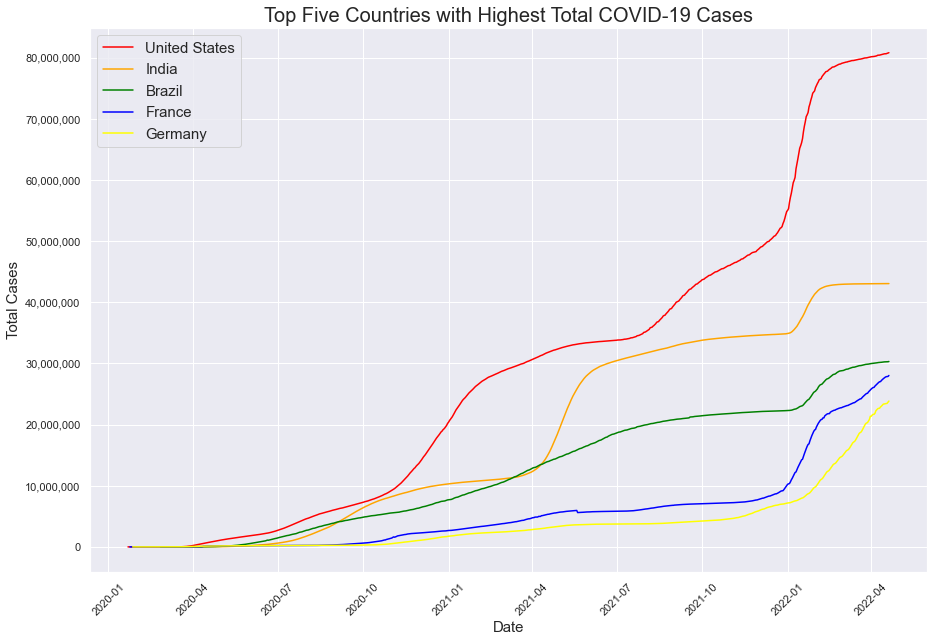

In [40]:
# Plot the total cases of the top 5 countries

sns.set()
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation= 45)
plt.ylabel('Total Cases', fontsize=15)
plt.title('Top Five Countries with Highest Total COVID-19 Cases', fontsize=20)
plt.ticklabel_format(style='plain') 
plt.plot(df_us.index, df_us['total_cases'], color="red", label = 'United States')
plt.plot(df_india.index, df_india['total_cases'], color="orange", label = 'India')
plt.plot(df_brazil.index, df_brazil['total_cases'], color="green", label = 'Brazil')
plt.plot(df_france.index, df_france['total_cases'], color="blue", label = 'France')
plt.plot(df_germany.index, df_germany['total_cases'], color="yellow", label = 'Germany')
plt.legend(prop={'size': 15})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

#### Total Deaths for the Top 5 Countries <a class="anchor" id="section_1_5_2"></a>

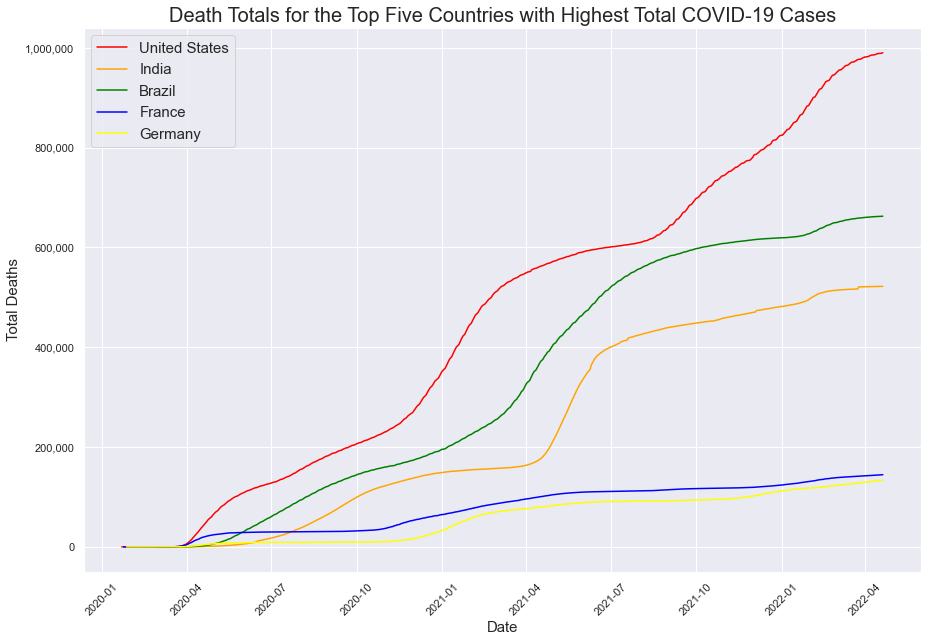

In [41]:
# Plot the total deaths of the top 5 countries

sns.set()
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths', fontsize=15)
plt.title('Death Totals for the Top Five Countries with Highest Total COVID-19 Cases', fontsize=20)
plt.ticklabel_format(style='plain') 
plt.plot(df_us.index, df_us['total_deaths'], color="red", label = 'United States')
plt.plot(df_india.index, df_india['total_deaths'], color="orange", label = 'India')
plt.plot(df_brazil.index, df_brazil['total_deaths'], color="green", label = 'Brazil')
plt.plot(df_france.index, df_france['total_deaths'], color="blue", label = 'France')
plt.plot(df_germany.index, df_germany['total_deaths'], color="yellow", label = 'Germany')
plt.legend(prop={'size': 15})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

#### Total Vaccinations for the Top 5 Countries <a class="anchor" id="section_1_5_3"></a>

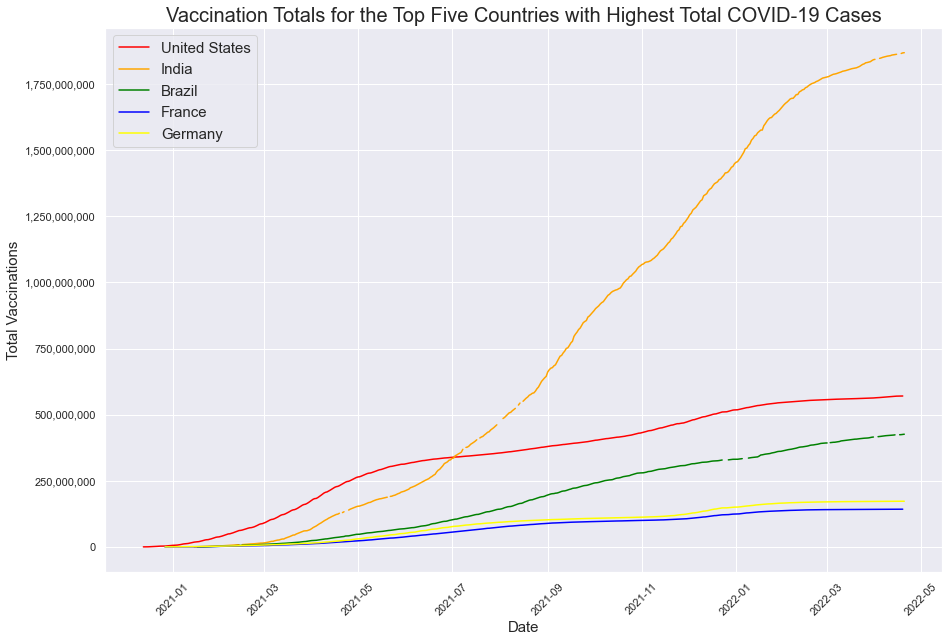

In [42]:
# Plot the total vaccinations of the top 5 countries

sns.set()
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation= 45)
plt.ylabel('Total Vaccinations', fontsize=15)
plt.title('Vaccination Totals for the Top Five Countries with Highest Total COVID-19 Cases', fontsize=20)
plt.ticklabel_format(style='plain') 
plt.plot(df_us.index, df_us['total_vaccinations'], color="red", label = 'United States')
plt.plot(df_india.index, df_india['total_vaccinations'], color="orange", label = 'India')
plt.plot(df_brazil.index, df_brazil['total_vaccinations'], color="green", label = 'Brazil')
plt.plot(df_france.index, df_france['total_vaccinations'], color="blue", label = 'France')
plt.plot(df_germany.index, df_germany['total_vaccinations'], color="yellow", label = 'Germany')
plt.legend(prop={'size': 15})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

#### Total Boosters for the Top 5 Countries <a class="anchor" id="section_1_5_4"></a>

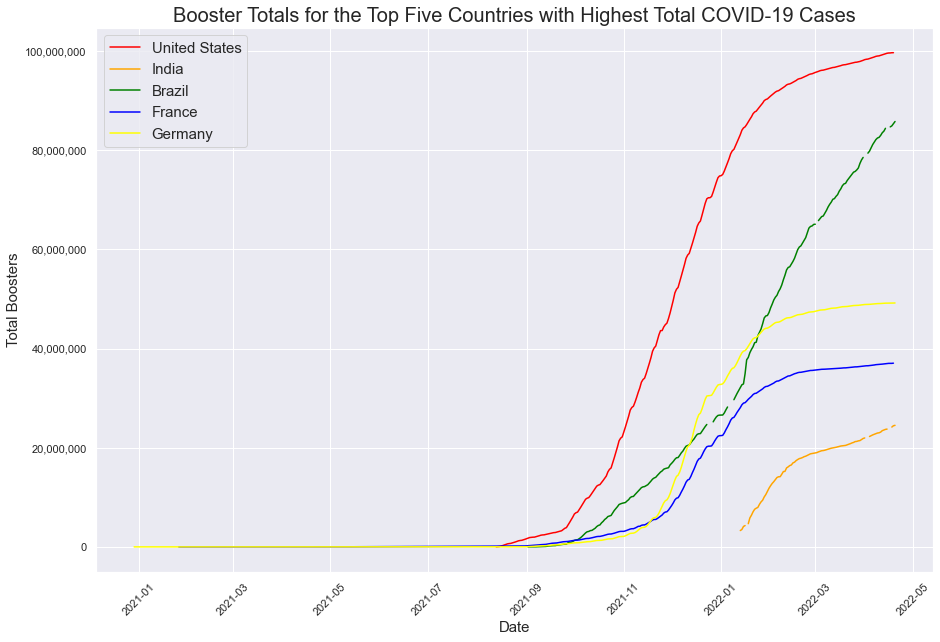

In [43]:
# Plot the total boosters of the top 5 countries

sns.set()
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation= 45)
plt.ylabel('Total Boosters', fontsize=15)
plt.title('Booster Totals for the Top Five Countries with Highest Total COVID-19 Cases', fontsize=20)
plt.ticklabel_format(style='plain') 
plt.plot(df_us.index, df_us['total_boosters'], color="red", label = 'United States')
plt.plot(df_india.index, df_india['total_boosters'], color="orange", label = 'India')
plt.plot(df_brazil.index, df_brazil['total_boosters'], color="green", label = 'Brazil')
plt.plot(df_france.index, df_france['total_boosters'], color="blue", label = 'France')
plt.plot(df_germany.index, df_germany['total_boosters'], color="yellow", label = 'Germany')
plt.legend(prop={'size': 15})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

## Univariate Timeseries Forecasting <a class="anchor" id="section_2"></a>
In this section, we will test and compare various univariate time series models including SARIMA, Facebook's Prophet, Exponential Smoothing, as well as the auto machine learning library FLAML. Each model will will be used to forecast future COVID-19 case and death totals for the top 5 countries with the highest COVID-19 cases to date. Each model will also be compared against each other using the evaluation metric MAPE which is the mean absolute percentage error. A more accurate model will have a lower MAPE score than a less accurate model.  

### Seasonal AutoRegressive Integrated Moving Average (SARIMA) <a class="anchor" id="section_2_1"></a>

#### Preparing the data <a class="anchor" id="section_2_1_1"></a>

In [44]:
# set the index for each country subset
df_us_total_cases.index = pd.to_datetime(df_us_total_cases['date'], format='%Y-%m-%d')
df_india_total_cases.index = pd.to_datetime(df_india_total_cases['date'], format='%Y-%m-%d')
df_brazil_total_cases.index = pd.to_datetime(df_brazil_total_cases['date'], format='%Y-%m-%d')
df_france_total_cases.index = pd.to_datetime(df_france_total_cases['date'], format='%Y-%m-%d')
df_germany_total_cases.index = pd.to_datetime(df_germany_total_cases['date'], format='%Y-%m-%d')

df_us_total_deaths.index = pd.to_datetime(df_us_total_deaths['date'], format='%Y-%m-%d')
df_india_total_deaths.index = pd.to_datetime(df_india_total_deaths['date'], format='%Y-%m-%d')
df_brazil_total_deaths.index = pd.to_datetime(df_brazil_total_deaths['date'], format='%Y-%m-%d')
df_france_total_deaths.index = pd.to_datetime(df_france_total_deaths['date'], format='%Y-%m-%d')
df_germany_total_deaths.index = pd.to_datetime(df_germany_total_deaths['date'], format='%Y-%m-%d')

del df_us_total_cases['date']
del df_india_total_cases['date']
del df_brazil_total_cases['date']
del df_france_total_cases['date']
del df_germany_total_cases['date']

del df_us_total_deaths['date']
del df_india_total_deaths['date']
del df_brazil_total_deaths['date']
del df_france_total_deaths['date']
del df_germany_total_deaths['date']

df_us_total_cases.drop(df_us_total_cases[(df_us_total_cases['total_cases'] ==0)].index, inplace=True)
df_india_total_cases.drop(df_india_total_cases[(df_india_total_cases['total_cases'] ==0)].index, inplace=True)
df_brazil_total_cases.drop(df_brazil_total_cases[(df_brazil_total_cases['total_cases'] ==0)].index, inplace=True)
df_france_total_cases.drop(df_france_total_cases[(df_france_total_cases['total_cases'] ==0)].index, inplace=True)
df_germany_total_cases.drop(df_germany_total_cases[(df_germany_total_cases['total_cases'] ==0)].index, inplace=True)

df_us_total_deaths.drop(df_us_total_deaths[(df_us_total_deaths['total_deaths'] ==0)].index, inplace=True)
df_india_total_deaths.drop(df_india_total_deaths[(df_india_total_deaths['total_deaths'] ==0)].index, inplace=True)
df_brazil_total_deaths.drop(df_brazil_total_deaths[(df_brazil_total_deaths['total_deaths'] ==0)].index, inplace=True)
df_france_total_deaths.drop(df_france_total_deaths[(df_france_total_deaths['total_deaths'] ==0)].index, inplace=True)
df_germany_total_deaths.drop(df_germany_total_deaths[(df_germany_total_deaths['total_deaths'] ==0)].index, inplace=True)

In [45]:
# make the data stationary 

df_us_total_cases_log = np.log(df_us_total_cases)
df_us_total_deaths_log = np.log(df_us_total_deaths)

df_india_total_cases_log = np.log(df_india_total_cases)
df_india_total_deaths_log = np.log(df_india_total_deaths)

df_brazil_total_cases_log = np.log(df_brazil_total_cases)
df_brazil_total_deaths_log = np.log(df_brazil_total_deaths)

df_france_total_cases_log = np.log(df_france_total_cases)
df_france_total_deaths_log = np.log(df_france_total_deaths)

df_germany_total_cases_log = np.log(df_germany_total_cases)
df_germany_total_deaths_log = np.log(df_germany_total_deaths)

In [46]:
train_us_total_cases = df_us_total_cases[df_us_total_cases.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_us_total_cases = df_us_total_cases[df_us_total_cases.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
train_us_total_deaths = df_us_total_deaths[df_us_total_deaths.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_us_total_deaths = df_us_total_deaths[df_us_total_deaths.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]

train_india_total_cases = df_india_total_cases[df_india_total_cases.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_india_total_cases = df_india_total_cases[df_india_total_cases.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
train_india_total_deaths = df_india_total_deaths[df_india_total_deaths.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_india_total_deaths = df_india_total_deaths[df_india_total_deaths.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]

train_brazil_total_cases = df_brazil_total_cases[df_brazil_total_cases.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_brazil_total_cases = df_brazil_total_cases[df_brazil_total_cases.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
train_brazil_total_deaths = df_brazil_total_deaths[df_brazil_total_deaths.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_brazil_total_deaths = df_brazil_total_deaths[df_brazil_total_deaths.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]

train_france_total_cases = df_france_total_cases[df_france_total_cases.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_france_total_cases = df_france_total_cases[df_france_total_cases.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
train_france_total_deaths = df_france_total_deaths[df_france_total_deaths.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_france_total_deaths = df_france_total_deaths[df_france_total_deaths.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]

train_germany_total_cases = df_germany_total_cases[df_germany_total_cases.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_germany_total_cases = df_germany_total_cases[df_germany_total_cases.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
train_germany_total_deaths = df_germany_total_deaths[df_germany_total_deaths.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test_germany_total_deaths = df_germany_total_deaths[df_germany_total_deaths.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]


In [47]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(train_germany_total_deaths)
pvalue

0.8273414537183894

In [48]:
### Import Packages ###

import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=100, freq='D'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
                mod = SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                #print('SARIMAX {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))

            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data

In [49]:
# packages needed for ARMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [173]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_us_total_cases['total_cases'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
707,"(2, 2, 2)","(0, 1, 2, 7)",15519.246823
725,"(2, 2, 2)","(2, 1, 2, 7)",15520.698832
221,"(0, 2, 2)","(0, 1, 2, 7)",15520.891829
716,"(2, 2, 2)","(1, 1, 2, 7)",15521.149706
464,"(1, 2, 2)","(0, 1, 2, 7)",15522.221636


In [174]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_india_total_cases['total_cases'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
707,"(2, 2, 2)","(0, 1, 2, 7)",15519.246823
725,"(2, 2, 2)","(2, 1, 2, 7)",15520.698832
221,"(0, 2, 2)","(0, 1, 2, 7)",15520.891829
716,"(2, 2, 2)","(1, 1, 2, 7)",15521.149706
464,"(1, 2, 2)","(0, 1, 2, 7)",15522.221636


In [175]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_brazil_total_cases['total_cases'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
392,"(1, 1, 2)","(1, 1, 2, 7)",13820.958951
383,"(1, 1, 2)","(0, 1, 2, 7)",13821.995961
635,"(2, 1, 2)","(1, 1, 2, 7)",13822.681649
401,"(1, 1, 2)","(2, 1, 2, 7)",13822.861863
626,"(2, 1, 2)","(0, 1, 2, 7)",13823.728367


In [176]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_france_total_cases['total_cases'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
716,"(2, 2, 2)","(1, 1, 2, 7)",15506.125184
221,"(0, 2, 2)","(0, 1, 2, 7)",15520.828272
230,"(0, 2, 2)","(1, 1, 2, 7)",15522.372923
239,"(0, 2, 2)","(2, 1, 2, 7)",15524.224553
724,"(2, 2, 2)","(2, 1, 1, 7)",15527.802599


In [177]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_germany_total_cases['total_cases'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
467,"(1, 2, 2)","(0, 2, 2, 7)",12377.745677
476,"(1, 2, 2)","(1, 2, 2, 7)",12379.188467
233,"(0, 2, 2)","(1, 2, 2, 7)",12380.020498
404,"(1, 1, 2)","(2, 2, 2, 7)",12385.128133
700,"(2, 2, 1)","(2, 2, 1, 7)",12390.734516


In [178]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_us_total_deaths['total_deaths'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
224,"(0, 2, 2)","(0, 2, 2, 7)",9327.919468
233,"(0, 2, 2)","(1, 2, 2, 7)",9328.192922
467,"(1, 2, 2)","(0, 2, 2, 7)",9328.909973
476,"(1, 2, 2)","(1, 2, 2, 7)",9329.089476
242,"(0, 2, 2)","(2, 2, 2, 7)",9330.192732


In [179]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_india_total_deaths['total_deaths'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
224,"(0, 2, 2)","(0, 2, 2, 7)",9327.919468
233,"(0, 2, 2)","(1, 2, 2, 7)",9328.192922
467,"(1, 2, 2)","(0, 2, 2, 7)",9328.909973
476,"(1, 2, 2)","(1, 2, 2, 7)",9329.089476
242,"(0, 2, 2)","(2, 2, 2, 7)",9330.192732


In [180]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_brazil_total_deaths['total_deaths'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
728,"(2, 2, 2)","(2, 2, 2, 7)",8346.530902
242,"(0, 2, 2)","(2, 2, 2, 7)",8357.469562
485,"(1, 2, 2)","(2, 2, 2, 7)",8359.469835
224,"(0, 2, 2)","(0, 2, 2, 7)",8360.018931
467,"(1, 2, 2)","(0, 2, 2, 7)",8361.982106


In [181]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_france_total_deaths['total_deaths'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
638,"(2, 1, 2)","(1, 2, 2, 7)",8062.607316
629,"(2, 1, 2)","(0, 2, 2, 7)",8065.925919
728,"(2, 2, 2)","(2, 2, 2, 7)",8071.301702
485,"(1, 2, 2)","(2, 2, 2, 7)",8074.243712
467,"(1, 2, 2)","(0, 2, 2, 7)",8077.265380


In [182]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(train_germany_total_deaths['total_deaths'], pdq, pdqs, freq='D')

,pdq,pdqs,aic
728,"(2, 2, 2)","(2, 2, 2, 7)",6995.294829
710,"(2, 2, 2)","(0, 2, 2, 7)",7000.971464
719,"(2, 2, 2)","(1, 2, 2, 7)",7001.144441
242,"(0, 2, 2)","(2, 2, 2, 7)",7003.768638
485,"(1, 2, 2)","(2, 2, 2, 7)",7005.724654


#### COVID-19 Case Predictions for The United States using SARIMA

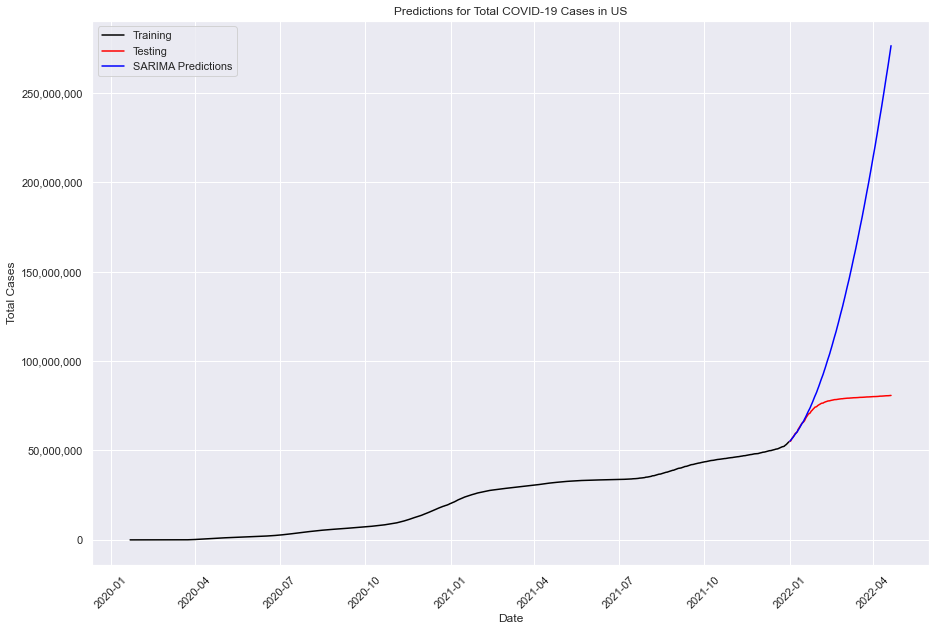

In [118]:
SARIMAXmodel = SARIMAX(train_us_total_cases['total_cases'], order = (2, 2, 2), seasonal_order=(0,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_us_total_cases.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_us_total_cases.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID-19 Cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train_us_total_cases, color = 'black', label = 'Training')
plt.plot(test_us_total_cases, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [119]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_us_total_cases['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.895642192918344


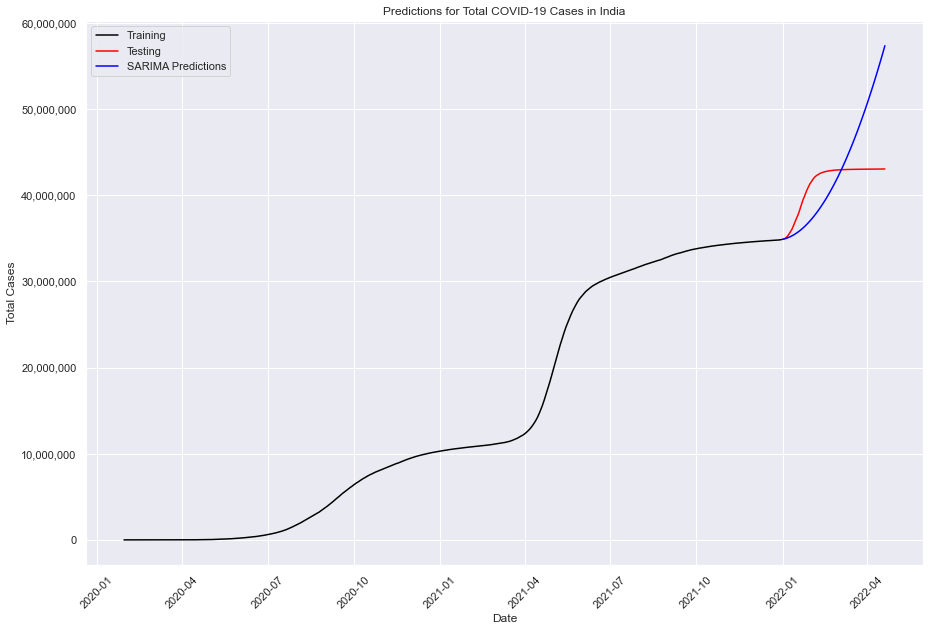

In [120]:
SARIMAXmodel = SARIMAX(train_india_total_cases['total_cases'], order = (2, 2, 2), seasonal_order=(0,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_india_total_cases.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_india_total_cases.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID-19 Cases in India')
plt.ticklabel_format(style='plain') 
plt.plot(train_india_total_cases, color = 'black', label = 'Training')
plt.plot(test_india_total_cases, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [121]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_india_total_cases['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.31475544199804256


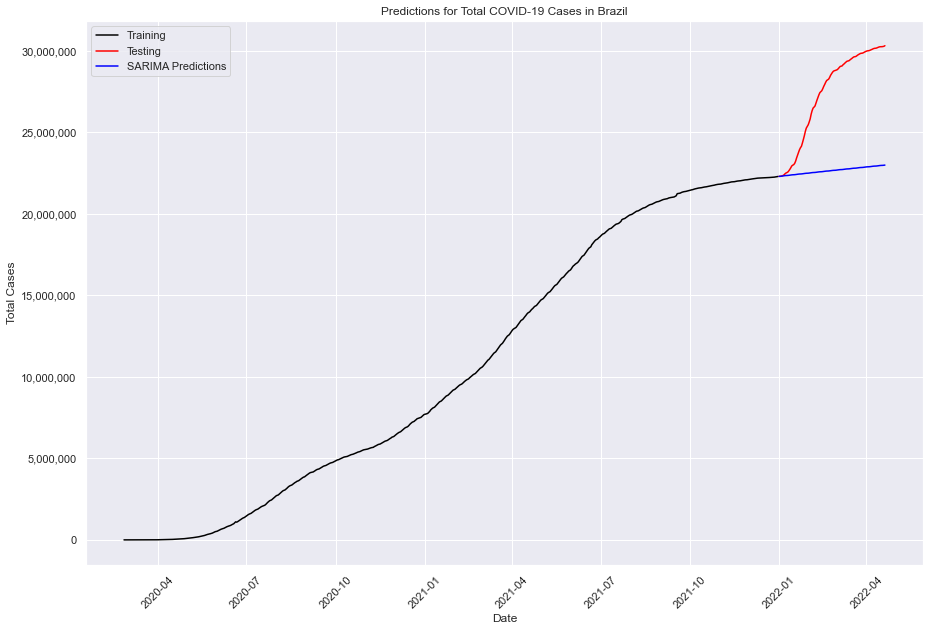

In [122]:
SARIMAXmodel = SARIMAX(train_brazil_total_cases['total_cases'], order = (1, 1, 2), seasonal_order=(1,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_brazil_total_cases.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_india_total_cases.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID-19 Cases in Brazil')
plt.ticklabel_format(style='plain') 
plt.plot(train_brazil_total_cases, color = 'black', label = 'Training')
plt.plot(test_brazil_total_cases, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [123]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_brazil_total_cases['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.40544807417542295


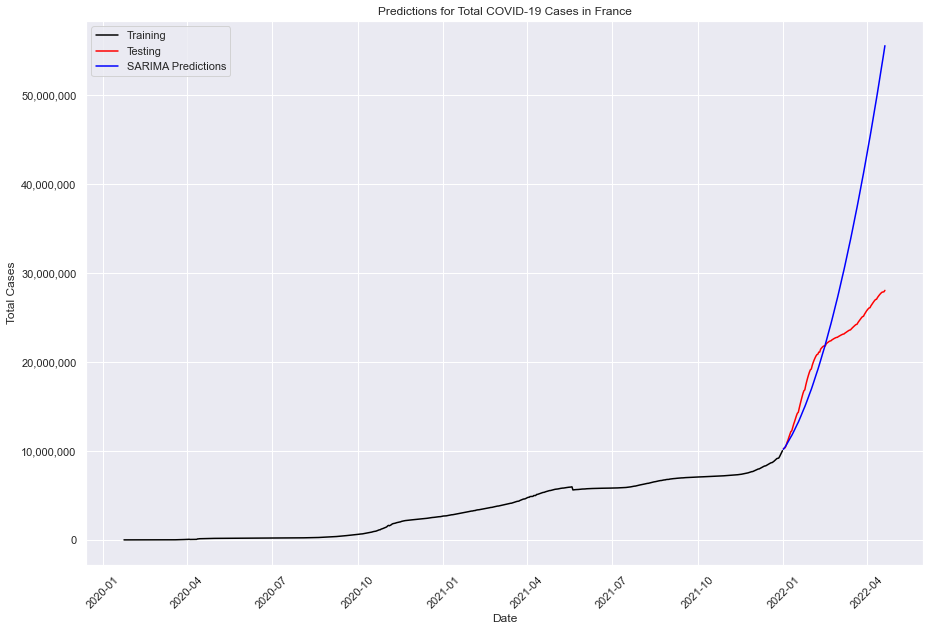

In [124]:
SARIMAXmodel = SARIMAX(train_france_total_cases['total_cases'], order = (2, 2, 2), seasonal_order=(1,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_france_total_cases.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_france_total_cases.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID-19 Cases in France')
plt.ticklabel_format(style='plain') 
plt.plot(train_france_total_cases, color = 'black', label = 'Training')
plt.plot(test_france_total_cases, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [125]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_france_total_cases['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.5664828676208686


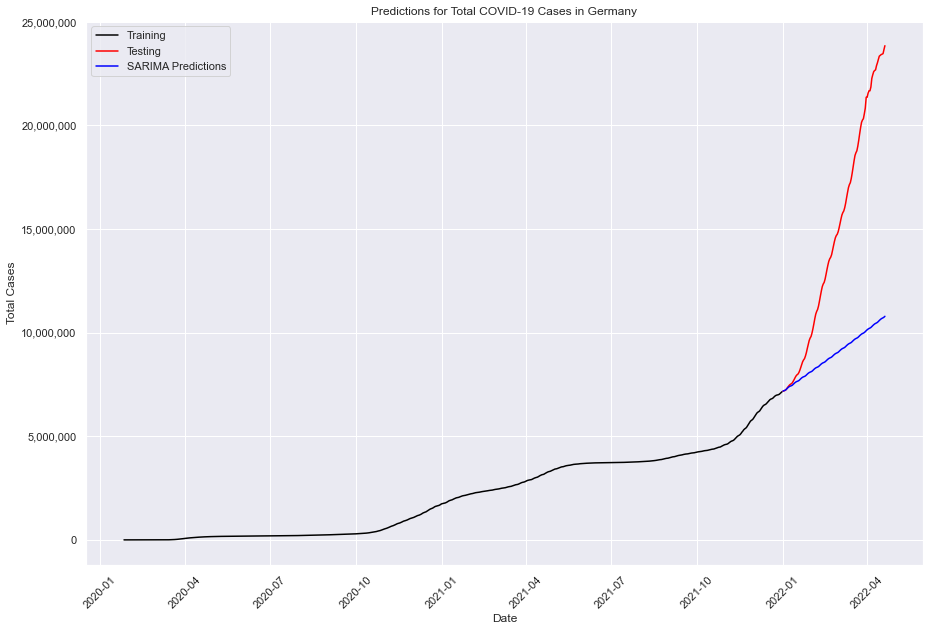

In [126]:
SARIMAXmodel = SARIMAX(train_germany_total_cases['total_cases'], order = (2, 2, 2), seasonal_order=(1,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_germany_total_cases.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_germany_total_cases.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID-19 Cases in Germany')
plt.ticklabel_format(style='plain') 
plt.plot(train_germany_total_cases, color = 'black', label = 'Training')
plt.plot(test_germany_total_cases, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [127]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_france_total_cases['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.7494267126604276


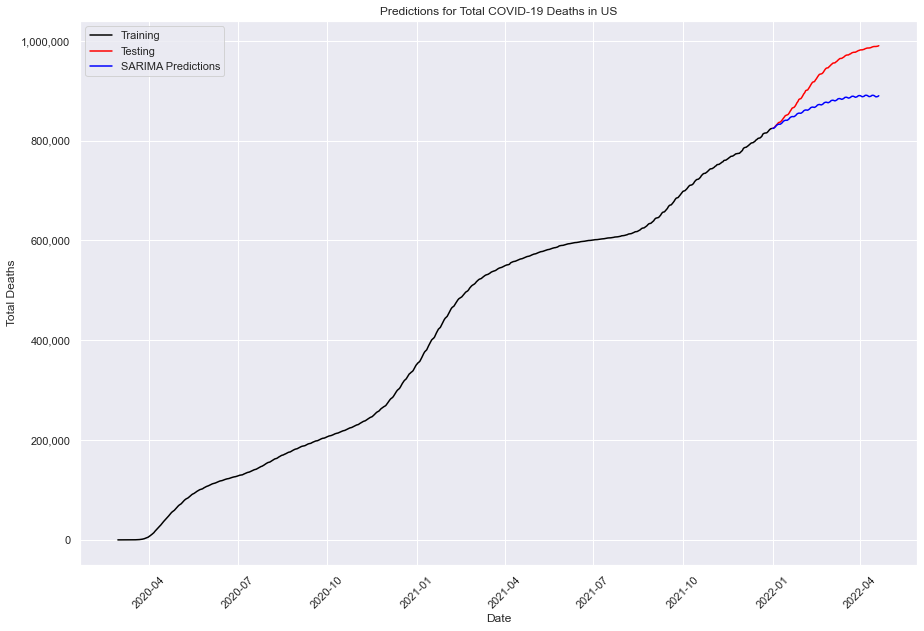

In [128]:
SARIMAXmodel = SARIMAX(train_us_total_deaths['total_deaths'], order = (0, 2, 2), seasonal_order=(0,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_us_total_deaths.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_us_total_deaths.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Predictions for Total COVID-19 Deaths in US')
plt.ticklabel_format(style='plain') 
plt.plot(train_us_total_deaths, color = 'black', label = 'Training')
plt.plot(test_us_total_deaths, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [129]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_us_total_deaths['total_deaths'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.24590775280534943


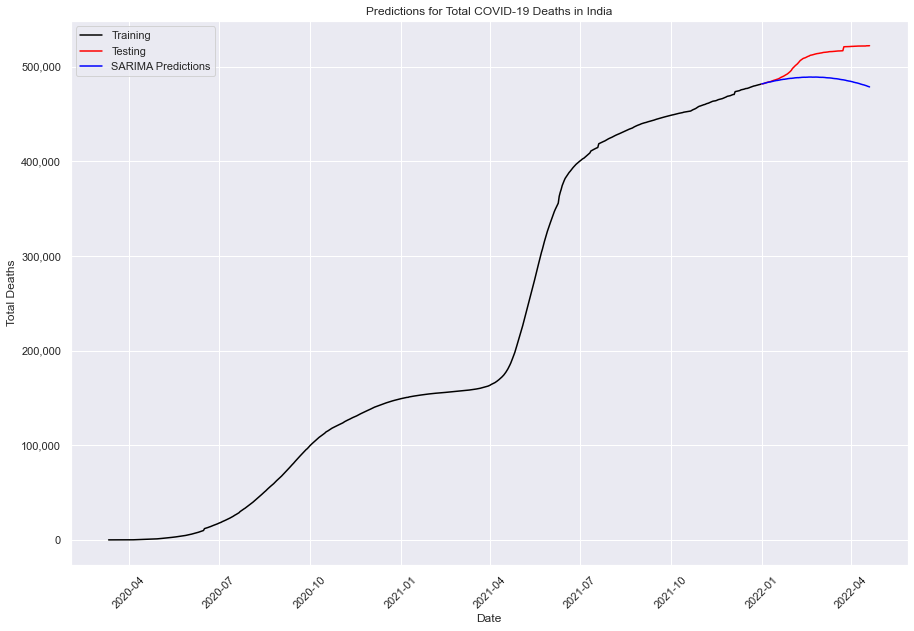

In [130]:
SARIMAXmodel = SARIMAX(train_india_total_deaths['total_deaths'], order = (0, 2, 2), seasonal_order=(0,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_india_total_deaths.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_india_total_deaths.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Predictions for Total COVID-19 Deaths in India')
plt.ticklabel_format(style='plain') 
plt.plot(train_india_total_deaths, color = 'black', label = 'Training')
plt.plot(test_india_total_deaths, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [131]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_india_total_deaths['total_deaths'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.20337667253980501


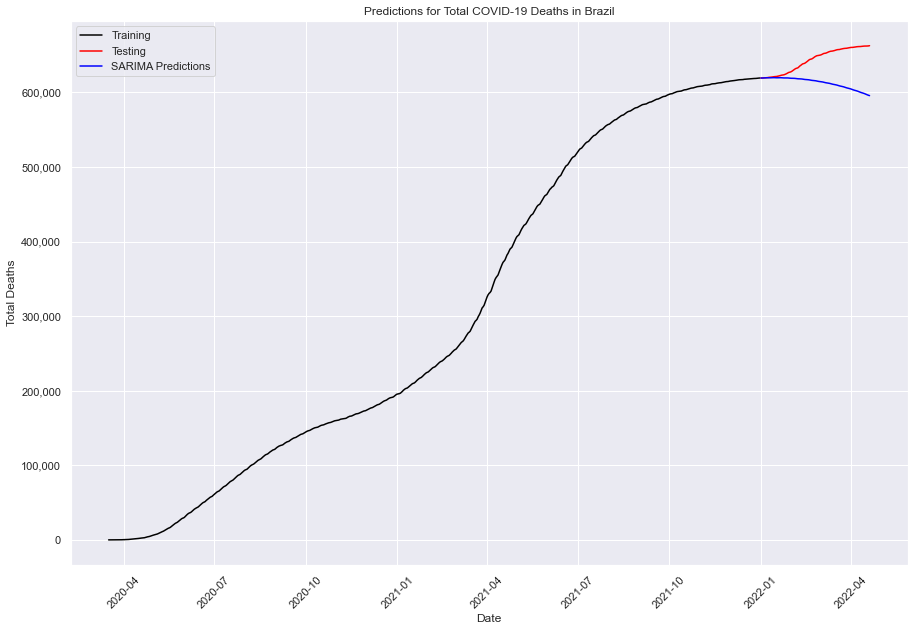

In [132]:
SARIMAXmodel = SARIMAX(train_brazil_total_deaths['total_deaths'], order = (0, 2, 2), seasonal_order=(2,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_brazil_total_deaths.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_brazil_total_deaths.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Predictions for Total COVID-19 Deaths in Brazil')
plt.ticklabel_format(style='plain') 
plt.plot(train_brazil_total_deaths, color = 'black', label = 'Training')
plt.plot(test_brazil_total_deaths, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [133]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_brazil_total_deaths['total_deaths'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.21561329402723955


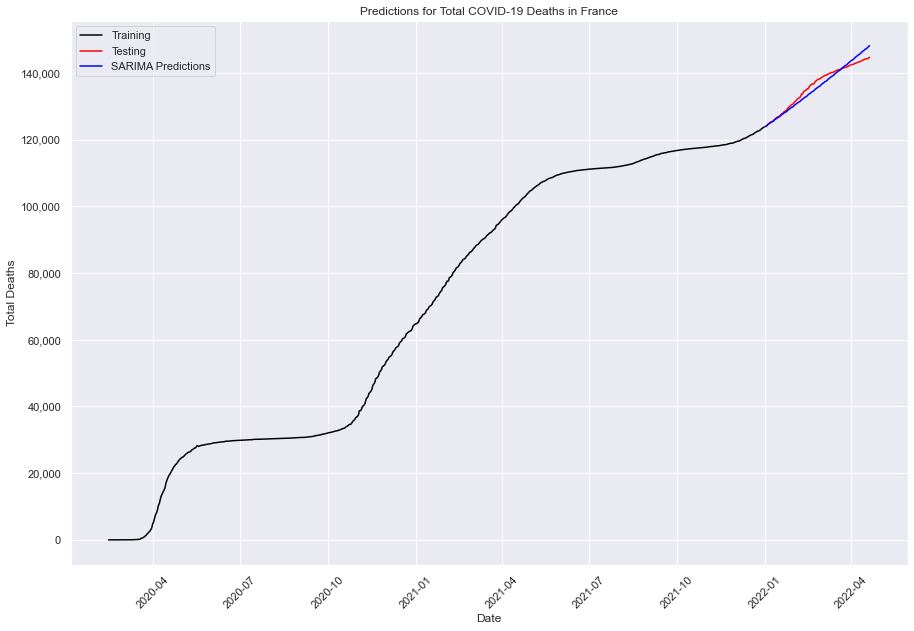

In [134]:
SARIMAXmodel = SARIMAX(train_france_total_deaths['total_deaths'], order = (2, 1, 2), seasonal_order=(1,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_france_total_deaths.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_france_total_deaths.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Predictions for Total COVID-19 Deaths in France')
plt.ticklabel_format(style='plain') 
plt.plot(train_france_total_deaths, color = 'black', label = 'Training')
plt.plot(test_france_total_deaths, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [135]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_france_total_deaths['total_deaths'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.09582526222775657


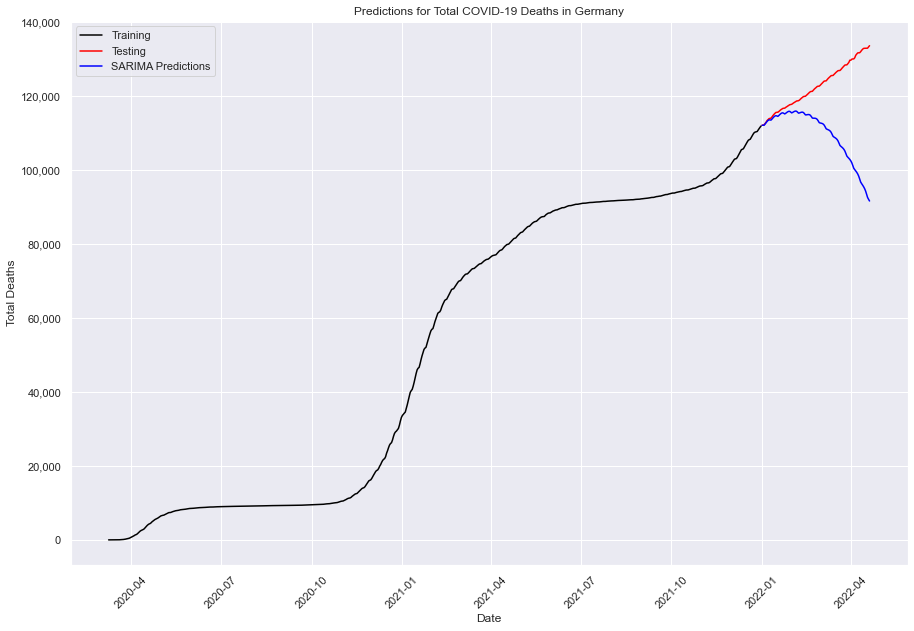

In [136]:
SARIMAXmodel = SARIMAX(train_germany_total_deaths['total_deaths'], order = (2, 2, 2), seasonal_order=(2,2,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test_germany_total_deaths.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test_germany_total_deaths.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Predictions for Total COVID-19 Deaths in Germany')
plt.ticklabel_format(style='plain') 
plt.plot(train_germany_total_deaths, color = 'black', label = 'Training')
plt.plot(test_germany_total_deaths, color = 'red', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [137]:
# Evaluate performance for SARIMA
SARIMA_mape = np.sqrt(mean_absolute_percentage_error(test_germany_total_deaths['total_deaths'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA MAPE: ", SARIMA_mape)

SARIMA MAPE:  0.31744523801171504
